In [5]:
%matplotlib inline

In [1]:
import cgi, os, re, sys
#import cgitb;cgitb.enable()
import json
import pandas as pd

import collections
import pandas as pd

import matplotlib
matplotlib.use('Agg')

import mpld3
from mpld3 import utils
from mpld3 import plugins
import seaborn_hm
import os.path

In [59]:
sessionid = "test"
process = "Translation"

outputpath= "../data/user_uploads/" + ''.join(sessionid) + "/heatmap/"
outputname = outputpath + process+ '.json'

/Users/annie/Sites/Heatmap/dist/python/virenv/lib/python2.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annie/Sites/Heatmap/dist/python/virenv/lib/python2.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/annie/Sites/Heatmap/dist/python/virenv/lib/python2.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


hm.height=
0.8613784135240574
hm.width=
0.7120001752199208
dcol.height=
0.10999999999999999
drow.width=
0.060433599614516165
dcol.y0
0.7275
{'axes': [{'xlim': (2.4091567898196193, 0.0), 'yscale': u'linear', 'axesbg': '#FFFFFF', 'texts': [], 'zoomable': True, 'images': [], 'xdomain': (2.4091567898196193, 0.0), 'ylim': (1840.0, 0.0), 'paths': [], 'sharey': [], 'sharex': [], 'axesbgalpha': None, 'axes': [{'scale': u'linear', 'tickformat': [], 'grid': {'gridOn': False}, 'visible': True, 'fontsize': None, 'position': 'bottom', 'nticks': 0, 'tickvalues': []}, {'scale': u'linear', 'tickformat': [], 'grid': {'gridOn': False}, 'visible': True, 'fontsize': None, 'position': 'left', 'nticks': 0, 'tickvalues': []}], 'lines': [], 'markers': [], 'id': 'el69824548486672', 'ydomain': (1840.0, 0.0), 'collections': [{'paths': [([[0.0, 55.0], [0.22737518947222454, 55.0], [0.22737518947222454, 65.0], [0.0, 65.0]], ['M', 'L', 'L', 'L']), ([[0.0, 75.0], [0.2533734866500834, 75.0], [0.2533734866500834, 85.0]

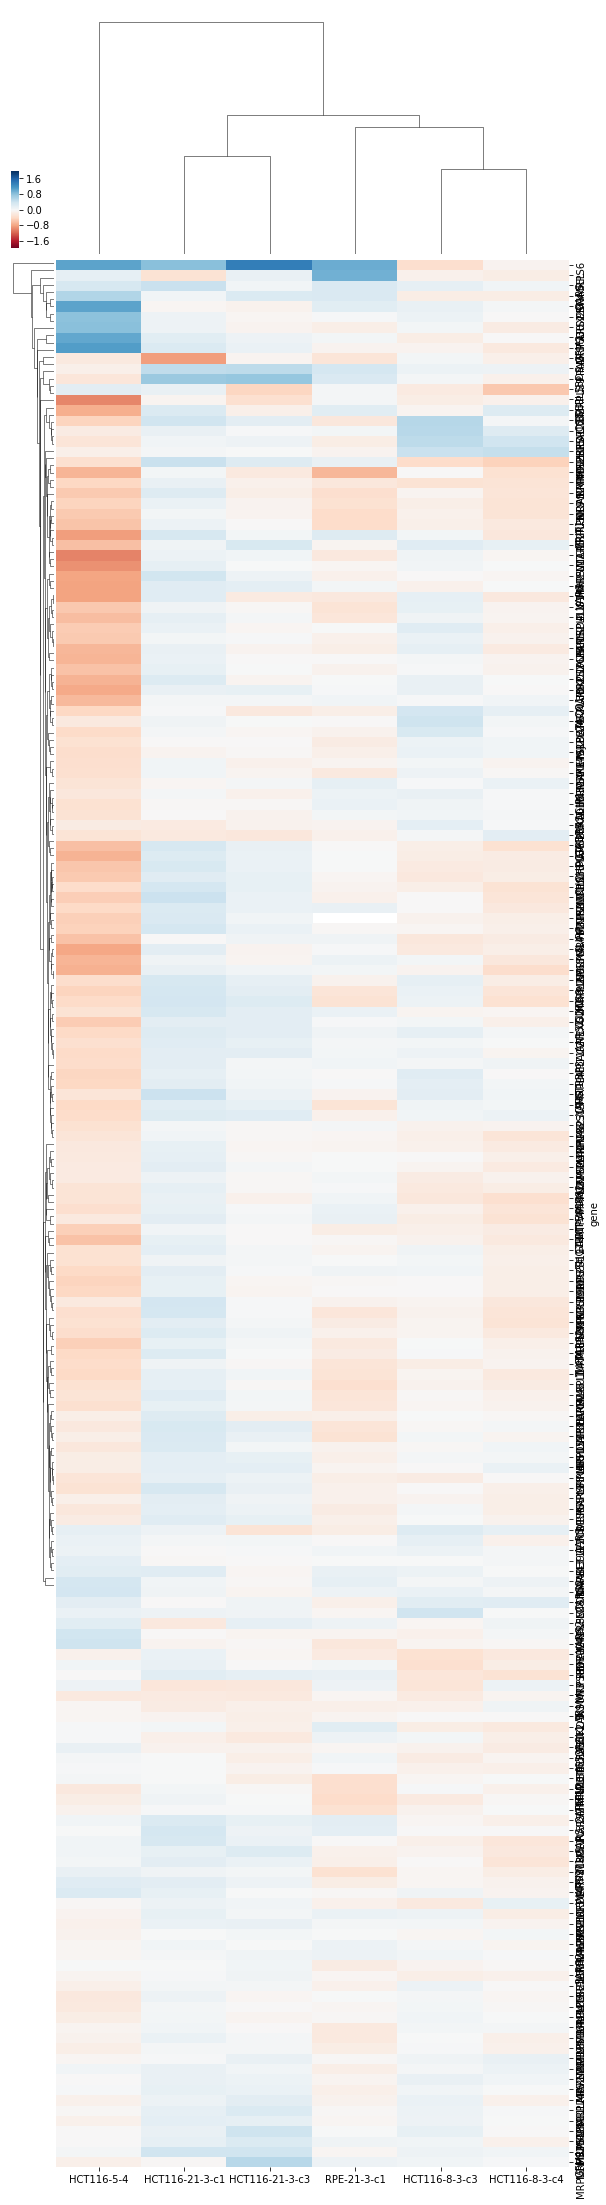

In [61]:
if not os.path.isfile(outputname):
    class PluginBase(object):
        def get_dict(self):
            return self.dict_

        def javascript(self):
            if hasattr(self, "JAVASCRIPT"):
                if hasattr(self, "js_args_"):
                    return self.JAVASCRIPT.render(self.js_args_)
                else:
                    return self.JAVASCRIPT
            else:
                return ""

        def css(self):
            if hasattr(self, "css_"):
                return self.css_
            else:
                return ""

    class PointHTMLTooltip2(PluginBase):

        def __init__(self, points, labels=None,
                     hoffset=0, voffset=10, css=None):
            self.points = points
            self.labels = labels
            self.voffset = voffset
            self.hoffset = hoffset
            self.css_ = css or ""
            if isinstance(points, matplotlib.lines.Line2D):
                suffix = "pts"
            else:
                suffix = None
            self.dict_ = {"type": "htmltooltip",
                          "id": utils.get_id(points, suffix),
                          "labels": labels,
                          "hoffset": hoffset,
                          "voffset": voffset}

    main = pd.read_csv("../data/user_uploads/" + ''.join(sessionid) + "/combined-heatmap.csv")
    main.set_index(['gene'],inplace=True)

    df = main[main['process'] == process]  

    info = df[['process','gene_function']]
    info.reset_index(inplace = True)

    df.drop(['process'],1,inplace=True)
    df.drop(['gene_function'],1,inplace=True)
    df.dropna(thresh=len(df.columns)*0.5,inplace=True)
    mask = df.isnull()
    df.fillna(0,inplace=True)

    if (df.shape[0] >= 3):

        ratio = float(df.shape[0])/50
        if (ratio < 1):
            ratio = 1
        canvasHeight = ratio * 7 + 5
        canvasHeightRatio = canvasHeight/12
        cbar_kws = { 'vmin' : -2, 'vmax':2, 'cmap':'RdBu'}
        cm= seaborn_hm.clustermap(df,mask=mask,figsize=(10,canvasHeight),**cbar_kws)

        p = cm.heatmap.mesh
        df2 = cm.data2d
        dcol = cm.ax_col_dendrogram.get_position()
        drow = cm.ax_row_dendrogram.get_position()
        cax = cm.cax.get_position()
        hm = cm.ax_heatmap.get_position()
#         cm.ax_col_dendrogram.set_position([dcol.x0-drow.width*0.75, dcol.y0, dcol.width, dcol.height*0.75])
#         cm.ax_row_dendrogram.set_position([drow.x0, drow.y0, drow.width*0.25, drow.height])
#         cm.ax_heatmap.set_position([hm.x0-drow.width*0.75, hm.y0, hm.width, hm.height])
#         cm.cax.set_position([cax.x0,cax.y0,cax.width,cax.height*0.75])
        cm.ax_col_dendrogram.set_position([dcol.x0, dcol.y0, dcol.width, 0.11])
        cm.ax_row_dendrogram.set_position([drow.x0, drow.y0, drow.width, drow.height])
        cm.ax_heatmap.set_position([hm.x0, hm.y0+hm.height*(1-ratio/canvasHeightRatio), hm.width, hm.height*ratio/canvasHeightRatio])
        cm.cax.set_position([cax.x0,cax.y0-(cax.height*0.25),cax.width,cax.height*0.75/canvasHeightRatio])
        
        
        hm = cm.ax_heatmap.get_position()
        dcol = cm.ax_col_dendrogram.get_position()
        drow = cm.ax_row_dendrogram.get_position()
        print("hm.height=")
        print(hm.height)
        print("hm.width=")
        print(hm.width)
        print("dcol.height=")
        print(dcol.height)
        print("drow.width=")
        print(drow.width)
        print("dcol.y0")
        print(dcol.y0)
        
        # cm.ax_col_dendrogram.set_position([dcol.x0, dcol.y0+((ratio-1)*0.04), dcol.width, 0.1])
        # cm.ax_row_dendrogram.set_position([drow.x0, drow.y0+((ratio-1)*0.04), drow.width, drow.height])
        # cm.ax_heatmap.set_position([hm.x0, hm.y0+((ratio-1)*0.04), hm.width, hm.height*ratio/1.5])
        # cm.cax.set_position([cax.x0,cax.y0+((ratio-1)*0.04)-0.02,cax.width,0.1])

        # print(cm.fig)

        df2 = df2.T
        df2= df2[df2.columns[::-1]]

        df3 = pd.DataFrame()
        index=0
        rowc=0
        for row in df2:
            colc=0
            for col in df2[row]:
                thing = {'gene': [row], 'sample': [df2.index[colc]], 'value': col}
                things = pd.DataFrame(thing, index=[index])
                if df3.empty:
                    df3 = things
                else:
                    df3 = pd.concat([df3,things])
                colc += 1
                index += 1
            rowc+=1

        df3 = pd.merge(df3,info,on='gene',how='left')

        labels = df3.to_json(orient='records')

        tooltip = PointHTMLTooltip2(p, labels,voffset=10, hoffset=10)
        plugins.connect(cm.fig, tooltip)

        html = mpld3.fig_to_dict(cm.fig)
        print(html)
#         with open(outputname, 'w') as fp:
#             json.dump(html, fp)